# Task 1

In [1]:
def Find(key, B, M, j):
    for i in range(M):
        if(B[i] == key):
            return j + 2 * i
        
    return -1

## Task 1.1
The input `j` should be an integer of either `0` or `1` where 0 indicates the array with even-numbered indices and 1 the odd-numbered indices. Since what `2*i` does is skipping an index, adding `j` will return an index that is always even or odd which corresponds to the actual index in array `A`.

In [2]:
A = [7,5,6,3,2,1,4,8,9]
A1 = [7,6,2,4,9]
A2 = [5,3,1,8]

In [3]:
Find(9, A1, len(A1), 0)

8

In [4]:
def RecursiveFind(key, B, M, j, i):
    if i < 1:
        return -1
    if B[i-1] == key:
        return j + 2 * (i-1)
    if B[M-i] == key:
        return j + 2 * (M-i)

    return RecursiveFind(key, B, M, j, i-1)
    

In [5]:
RecursiveFind(4, A1, len(A1), 0, len(A1))

6

In [6]:
RecursiveFind(1, A2, len(A2), 1, len(A2))

5

## Task 1.2
```
1 function RecursiveFind(key, B, M, j, i):
2     if (i < 1):
3         return -1
4     if B[i-1] == key:
5         return j + 2 * (i-1)
6     if B[M-i] == key:
7         return j + 2 * (M-i)
8     return RecursiveFind(key, B, M, j, i-1)
```

## Task 1.3
The master theorem states that: <br/>
$$T(n) = aT(n/b) + f(n)$$ <br>
where $a \leq 1$ and $b > 1$
<br>
Since in $T(M) = T(M-2) + c$, $c$ is a constant, this does not satisfy the requirement where the second term in the master theorem has to be a function of $M$ as well, therefore the master theorem is not applicable here.

# Task 2

## Task 2.1
In terms of time complexity, the best-case inputs are when `key` is the first element in `A1`. The worst-case inputs are when `key` is not in either `A1` or `A2` and the algorithm has to go through every element in both arrays just to return `-1` in the end.


## Task 2.2
### Assumption:
`ceiling` and `floor` are of 1 time unit.
### Worst case:
Worst case running time: $T(N) = 12N + 21$ <br>
When `key` is the not in both `A1` and  `A2`, the algorithm has to run both `Find` functions. <br><br>
<img src="./img/2.2 - find worst.png" width=600> <br><br>
Each for loop running time can be described as below:<br><br>
<img src="./img/2.2 - for loop worst.png" width=400> <br><br>
The `If` part takes $4$ time units and runs $N+1$ times and the increment part takes $3$ time units and run $N$ times. Therefore the for loop excluding the instructions is $4(N+1) + 3N = 7N + 5$. <br>
Continuing, the instructions have $5$ time units running $N$ times. Taking into account the outter-most return statement of $1$ time unit, the total becomes: <br><br>
$$7N + 5 + 5N + 1 = 12N + 6$$ <br><br>
For the first `find` function: $12 * ceiling(N/2) + 6$<br>
For the second `find` function: $12 * floor(N/2) + 6$<br><br>
<img src="./img/2.2 - r0 worst.png" width=600> <br><br>
Hence, total:
 $$T(N) = 12N + 21$$
### Best case:
Best case running time: $T(N) = 23$ or $T(N) = constant$ <br>
This is because the number of steps will always be the same when `key` is the first element in `A1` no matter the size of the array. <br>
Counting the time units in the for loop (only run once):<br><br>
<img src="./img/2.2 - for loop best.png" width=400><br><br>
<img src="./img/2.2 - find best.png" width=600><br><br>
All together:<br><br>
<img src="./img/2.2 - r0 best.png" width=600><br><br>
Total:
$$T(N) = 23 \;or\; T(N) = constant$$

## Task 2.3
Growth of worst case $T(N)$: $N$ <br>
Growth of best case $T(N)$: $1$


## Task 2.4
### Worst case:
$$T(N) = 12N + 21\; is \; \Theta(g(N))$$
<br>
where the positive constants $c_1=1$, $c_2=23$, and $m_0=2$ such that <br><br>
$$c_1g(N) \leq T(N) \leq c_2g(N)$$
$$for \; all \; n \geq m_0$$

### Best case:
$$T(N) \; is \; \Theta(1)$$



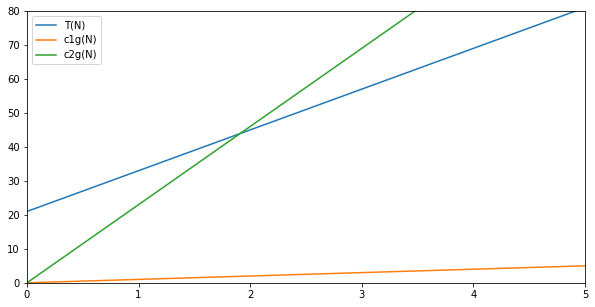

In [18]:
import pandas as pd
import numpy as np

def g(c, n):
    return c*n
def t(n):
    return 12*n + 21
c1 = 1
c2 = 23
m0 = 2
ts = [t(n) for n in range(1000)]
gs1 = [g(c1, n) for n in range(1000)]
gs2 = [g(c2, n) for n in range(1000)]
pd.Series(ts, name="T(N)").plot(figsize=(10,5))
pd.Series(gs1, name="c1g(N)").plot()
ax = pd.Series(gs2, name="c2g(N)").plot()
ax.legend()
# ax.axvline(m0, color="red")
ax.set_xlim(0,5)
ax.set_ylim(0,80)
print()

In [8]:
Q = {
    1: 5 + 10 + 5,
    2: 8 + 8 + 5 + 6,
    3: 8 + 6,
    4: 8 + 6,
    5: 25
}

# Task 3

In [9]:
def NewFind(key, A, N):
    for i in range(N):
        if(A[i] == key):
            return i
    return -1
    
            
def R1(key, A, B, N):
    index1 = NewFind(key, A, N)
    index2 = NewFind(key, B, N)
    if index1 == index2:
        return index1
    return -2

A = [7,5,6,3,2,1,4,8,10]
B = [7,5,6,3,2,1,4,8,9]

R1(9, A, B, len(A))

-2

## Task 3.1
Assumption: At most one array might have its values altered. This means at least one of the two arrays has all the correct values.
```         
1 function R1(key, A, B, N):
2    index1 = NewFind(key, A, N)
3    index2 = NewFind(key, B, N)
4    if index1 == index2:
5        return index1
6    return -2
```
```
1 function NewFind(key, A, N):
2    for 0 <= i < N
3        if(A[i] == key):
4            return i
5    return -1
```


## Task 3.2
The worst case inputs are when the value `key` are not present in both `A` and `B` arrays. This means the worst case for the `NewFind` function call, which has a growth of `N`. As the `NewFind` function is called twice, this means the `R1` function has a growth of $N^2$. <br>
As such, the Theta notation for the worst-case running time $(TN)$ of `R1` is:
$$\Theta(N^2)$$

# Task 4

## Task 4.1
Assumptions:
1. Hashing function avoids collisions in the hashed values for distinct values. If the index value `i` returned from array `B` is not `-1` and `A[i] != key`, the data has been altered unintentionally or incorrectly replaced by linear probing, which are  both considered as data storage errors.
1. It is expected to only return the index of the first occurence of `key` in `A`.
1. Hashed value returned from the hash_function is less than $N^2$
1. The values in array `B` are never altered to `-1` in case of error in data storage.
1. The values in array `B` are never larger than `N` which would result in array access error.

Pseudocode:

```
1 function R1Hash(key, a, b, A, B, N):
2    j = hash_function(key, a, b, N)
3    i = B[j]
4    if i == -1:
5        return -1
6    if A[i] == key:
7        return i
8    return -2
```

## Task 4.2
Same assumptions listed in the answers of Task 4.1.
- Line `2`: returns the hash `j` using the same hash function used to hash the values in `A`.
- Line `3`: access the array `B` at index `j` to get the hashed value and store it as `i`. 
- Line `4` & `5`: If `i == -1`, this means that `key` is not a value in `A` that has been hashed, and therefore not present in `A`. Therefore,`-1` is returned. 
- Line `6` & `7`: Access the array `A` at index `i`, and if the value is equal to `key`, `i` is returned as the correct index where the value `key` is stored.
- Line `8`: Otherwise, return `-2` as one of the arrays might have been altered unintentionally. E.g. The value in `B[j]` is altered to a value such that `A[B[j]` doesn't return the same value as `key`. Or the value in `A[i]` is altered to be different than `key`.


In [10]:
def hash_func(key, a, b, N):
    return (a * key + b) % N**2


def hash_with_linear_probe(a, b, A, B, N):
    i = 0
    while i < N:
        v = A[i]
        hash = hash_func(v, a, b, N)
        if B[hash] == -1:
            B[hash] = i
        else:
            j = 1
            while B[(hash + j) % N**2] != -1:
                j += 1
            B[(hash + j) % N**2] = v
        i += 1
    return B

def R1Hash(key, a, b, A, B, N):
    j = hash_func(key, a, b, N)
    i = B[j]
    if i == -1:
        return -1
    if i < N:
        if A[i] == key:
            return i
    return -2

A = [7,5,6]
B = [-1,2,-1,-1,0,-1,-1,1,-1]
key=3
a=3
b=1
N = len(A)
B_new = [-1 for i in range(N**2)]
# hash_with_linear_probe(a,b,A,B_new,len(A))

In [11]:
n = 4
[hash_func(i, a, b, n) for i in range(n)]

[1, 4, 7, 10]

In [12]:
R1Hash(7, a,b,A,B_new,N)

-1

# Task 5
<img src="./img/r10.png" width=600> <br><br>
The proposed setting for storing and searching the data in an array of non-integers, `R10` is a combination of both `R0` and `R1`. The idea is to stripe the data in the original array `A` evenly across two arrays where first array stores the values `A[i]` where `i` is an even number, and the second array stores the values `A[j]` where `j` is an odd number. On top of that, copies are created for redundancy purposes. In the case of hardware failure, i.e. at most one of array might have its values altered, the redundancy provides the possibility to verify if the values return at a specific index from the both the supposedly identical arrays are the same.
<img src="./img/r10 error detection.png" width=600> <br><br>


## Task 5.1
Psuedocode:
```
1. function R10(key, B1, B2, C1, C2, N):
2.     result = R10Search(key, B1, C1, ceiling(N/2), 0)
3.     if result == -1:
4.         return R10Search(key, B2, C2, floor(N/2), 1)
5.     return result

1. function R10Search(key, A1, A2, N, j):
2.     index1 = Find(key, A1, N, j)
3.     index2 = Find(key, A2, N, j)
4.     if index1 == index2:
5.         return index1
6.     return -2

1. function Find(key, B, N, j):
2.    for 0 <= i < N:
3.         if(B[i] == key):
4.             return j + 2 * i
5.     return -1

```

## Task 5.2
Assumption: At most one array might have its values altered. <br> <br>
To call the `R10`, we pass the parameters `key`, the four striped arrays `B1`, `B2`, `C1`, `C2` and the length of the original array `N` to the function. `B1` and `C1` are the arrays that store the values in `A` with <em>even</em> indices, whereas and `B2` and `C2` store the values in `A` with <em>odd</em> indicies. <br><br>

#### The `R10` function: 
Line `2`:<br>
The algorithm first call the `R10Search` function to search both the striped arrays that store the values with even indices (indicated by the input `j = 0`). It then checks the indices returned from searching the arrays to see if they are identical. <br>
If they are identical, this means:
1. `key` is found in both arrays, which returns the index of `key` in array `A`, or
2. `key` is <em>not</em> found in both arrays, which returns `-1`.

In any case, the result is returned.<br>
If they are not identical, this means value in one of the arrays have been altered unintentionally, which is a data storage error. In this case, `-2` is returned. <br><br>
Line `3`: <br>
If the `result` from searching the arrays that store the values with <em>even</em> indices is not `-1`, then the algorithm proceeds to line `5` and returns the result, which could be the index of `key` in `A`, or `-2` should a data storage error occured. Else, the algorithm continues with line `4`.<br><br>

Line `4`: <br>
Repeats the process similar to line `2` with arrays that store values with <em>odd</em> indices and returns the result from the search.

## Task 5.3
The best case inputs are when the `key` is the first element in array `A`. <br>
The worst case inputs are when the `key` is not an element in array `A`. <br>


## Task 5.4


In [13]:
A = [7,5,6,3,2,1,4,8,9]
B1 = [7,6,2,4,9]
B2 = [5,3,1,8]
C1 = [7,6,2,4,9]
C2 = [5,3,1,8]

In [14]:
import numpy as np

def Find(key, B, M, j):
    for i in range(M):
        if(B[i] == key):
            return j + 2 * i
    return -1

def R10Search(key, A1, A2, N, j):
    index1 = Find(key, A1, N, j)
    index2 = Find(key, A2, N, j)
    if index1 == index2:
        return index1
    return -2

def R10(key, B1, B2, C1, C2, N):
    result = R10Search(key, B1, C1, int(np.ceil(N/2)), 0)
    if result == -1:
        return R10Search(key, B2, C2, int(np.floor(N/2)), 1)
    return result


In [16]:
import pandas as pd
import numpy as np

def g(c, n):
    return c*n
def t(n):
    return 24*n + 49
c1 = 1
c2 = 40
m0 = 4
ts = [t(n) for n in range(1000)]
gs1 = [g(c1, n) for n in range(1000)]
gs2 = [g(c2, n) for n in range(1000)]
pd.Series(ts, name="T(N)").plot(figsize=(10,5))
pd.Series(gs1, name="c1g(N)").plot()
ax = pd.Series(gs2, name="c2g(N)").plot()
ax.legend()
# ax.axvline(m0, color="red")
ax.set_xlim(0,10)
ax.set_ylim(0,300)
print()